In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
cvd = pd.read_csv('datasets/logistic-regression/framingham.csv')
cvd.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Checking for null/missing values

In [3]:
cvd.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
cvd.shape

(4240, 16)

In [5]:
cvd.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


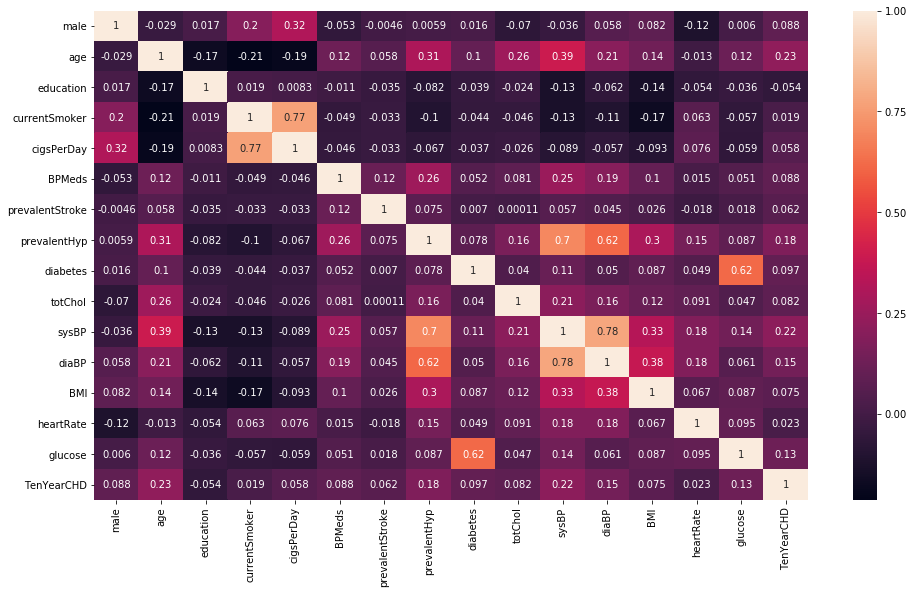

In [6]:
plt.figure(figsize = (16, 9))
sns.heatmap(cvd.corr(), annot = True)
plt.show()

## Data Preprocessing for Imputing Null Values

In [7]:
cvd.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

In [12]:
im = SimpleImputer(strategy = 'most_frequent')
# strategies: mean, meidan, most_frequent
cvd[['education', 'BPMeds']] = im.fit_transform(cvd[['education', 'BPMeds']])

In [13]:
im = SimpleImputer(strategy = 'mean')
cvd[['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']] = im.fit_transform(
    cvd[['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']])

In [14]:
edu = pd.get_dummies(cvd['education'], prefix='edu').iloc[:, :-1]
cvd_modi = pd.concat([edu, cvd], axis = 1)

In [15]:
cvd_modi.drop(columns = 'education', inplace = True)

In [16]:
cvd_modi

,edu_1.0,edu_2.0,edu_3.0,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,0,0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,1,0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,0,0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,0,1,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,0,1,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,1,0,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,1,0,0,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,0,1,0,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,0,0,1,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [17]:
cvd_modi.isnull().sum()

edu_1.0            0
edu_2.0            0
edu_3.0            0
male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [18]:
X = cvd_modi.iloc[:,:-1]
y = cvd_modi.iloc[:,-1]
X.shape

(4240, 17)

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2968, 17), (1272, 17), (2968,), (1272,))

In [21]:
from scipy.stats import chi2
degreesoffreedom = x_train.shape[0] - 1  - (x_train.shape[1] - 1)

In [27]:
model = sm.GLM(y_train, x_train, family = sm.families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 2968
Model:                            GLM   Df Residuals:                     2951
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1196.3
Date:                Sun, 23 Feb 2020   Deviance:                       2392.6
Time:                        11:19:29   Pearson chi2:                 3.06e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
edu_1.0            -0.0840      0.166     

In [30]:
print("INFO: Null deviance =", model.null_deviance)
print("INFO: Residual Deviance =", model.deviance)
print("INFO: Critical Value of Chi2 =", chi2.ppf(0.95, degreesoffreedom))
print("INFO: Pearson Chi2 = ", model.pearson_chi2)
print("INFO: P-value chi2 =", 1 - chi2.cdf(model.pearson_chi2, degreesoffreedom))
print("INFO: AIC =", model.aic)

INFO: Null deviance = 2549.772420082545
INFO: Residual Deviance = 2392.614316839926
INFO: Critical Value of Chi2 = 3078.4917882655923
INFO: Pearson Chi2 =  3060.642822392109
INFO: P-value chi2 = 0.07801724408272714
INFO: AIC = 2426.614316839926


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,5.021099,edu_1.0
1,3.629170,edu_2.0
2,2.451281,edu_3.0
3,2.116067,male
4,42.402129,age
5,4.859853,currentSmoker
6,4.156662,cigsPerDay
7,1.132077,BPMeds
8,1.025186,prevalentStroke
9,2.380557,prevalentHyp


In [23]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
from sklearn.feature_selection import RFE

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
selector = RFE(logmodel)
selector.fit(x_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=None, step=1, verbose=0)

In [39]:
selector.ranking_

array([ 6,  1,  1,  1,  1,  4,  2,  1,  1,  1,  1, 10,  5,  7,  3,  9,  8])

In [41]:
selector.support_

array([False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False, False, False, False, False, False])

In [43]:
X.columns[selector.support_]

Index(['edu_2.0', 'edu_3.0', 'male', 'age', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes'],
      dtype='object')

In [44]:
df_for_vif = cvd_modi[['edu_2.0', 'edu_3.0', 'male', 'age', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes']]
vif_new = pd.DataFrame()
vif_new['VIF Factor'] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif_new['features'] = df_for_vif.columns
vif_new

,VIF Factor,features
0,1.450548,edu_2.0
1,1.273836,edu_3.0
2,1.717499,male
3,3.195148,age
4,1.120155,BPMeds
5,1.022009,prevalentStroke
6,1.657147,prevalentHyp
7,1.038256,diabetes


In [51]:
df_for_vif

,edu_2.0,edu_3.0,male,age,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,0,0,1,39,0.0,0,0,0
1,1,0,0,46,0.0,0,0,0
2,0,0,1,48,0.0,0,0,0
3,0,1,0,61,0.0,0,1,0
4,0,1,0,46,0.0,0,0,0
...,...,...,...,...,...,...,...,...
4235,1,0,0,48,0.0,0,0,0
4236,0,0,0,44,0.0,0,0,0
4237,1,0,0,52,0.0,0,0,0
4238,0,1,1,40,0.0,0,1,0


In [60]:
df_final = cvd_modi[['edu_2.0', 'edu_3.0', 'male', 'age', 'BPMeds', 'prevalentStroke', 
                     'prevalentHyp', 'diabetes', 'TenYearCHD']]
df_final.head()

,edu_2.0,edu_3.0,male,age,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,0,0,1,39,0.0,0,0,0,0
1,1,0,0,46,0.0,0,0,0,0
2,0,0,1,48,0.0,0,0,0,0
3,0,1,0,61,0.0,0,1,0,1
4,0,1,0,46,0.0,0,0,0,0


In [62]:
df_final.shape

(4240, 9)

In [64]:
df_final.to_csv("datasets/logistic-regression/framingham_selected_features.csv", index = False)